# Ricardo Fabián Zúñiga

In [2]:
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

os.chdir('/Users/admin/Downloads/EBAC/proyecto_empresaAliada/modulo 58_pe/')
df = pd.read_csv("ventasConProductos_E.csv")
# Filtrado de productos, solo tomar en cuanta los productos Vanish y Lysol
df = df[df['ITEM_DESCRIPTION'].str.contains('vanish|lysol', case=False, na=False)]

## Separacion de Datos de Ventas en DataFrames Separados

In [4]:
# Filtrado de productos, solo tomar en cuanta los productos Vanish 
df_V = df[df['ITEM_DESCRIPTION'].str.contains('vanish', case=False, na=False)]
df_V = df_V[['WEEK', 'TOTAL_VALUE_SALES']]
df_V = df_V.groupby('WEEK')[['TOTAL_VALUE_SALES']].mean().reset_index()
# Ordenamiento y cambiar Indexacion
df_V[['week', 'B']] = df_V['WEEK'].str.split('-', expand=True)
df_V['week'] = df_V['week'].astype(int)
df_V['B'] = df_V['B'].astype(int)
df_V = df_V.sort_values(by=['week', 'B'])
df_V = df_V[['week', 'TOTAL_VALUE_SALES']]
df_V.index = df_V['week']
df_V = df_V.drop('week', axis = 1)
df_V.head()

,TOTAL_VALUE_SALES
week,
1,73.563117
1,101.185033
2,67.361606
2,94.933188
3,57.734233


In [5]:
# Filtrado de productos, solo tomar en cuanta los productos Lysol 
df_L = df[df['ITEM_DESCRIPTION'].str.contains('lysol', case=False, na=False)]
df_L = df_L[['WEEK', 'TOTAL_VALUE_SALES']]
df_L = df_L.groupby('WEEK')[['TOTAL_VALUE_SALES']].mean().reset_index()
# Ordenamiento y cambiar Indexacion
df_L[['week', 'B']] = df_L['WEEK'].str.split('-', expand=True)
df_L['week'] = df_L['week'].astype(int)
df_L['B'] = df_L['B'].astype(int)
df_L = df_L.sort_values(by=['week', 'B'])
df_L = df_L[['week', 'TOTAL_VALUE_SALES']]
df_L.index = df_L['week']
df_L = df_L.drop('week', axis = 1)
df_L.head()

,TOTAL_VALUE_SALES
week,
1,49.962229
1,24.679256
2,64.242800
2,22.440500
3,65.814914


## Inicio del analisis de tiempo para los productos Vanish

<Axes: xlabel='week'>

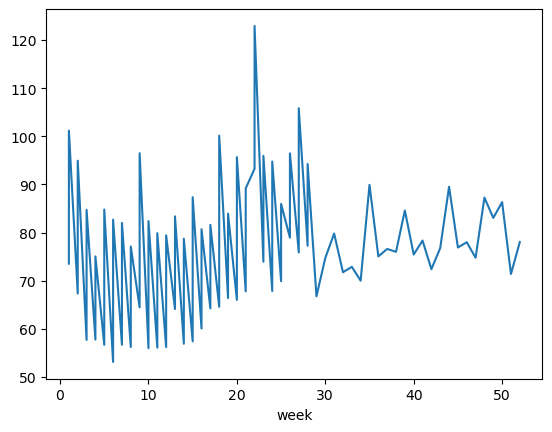

In [7]:
df_V["TOTAL_VALUE_SALES"].plot()

### Por como se comporta la grafica se puede suponer que se trata de una serie estacionaria

In [9]:
# Definicion de grupos de prueba y entrenamiento
len_train = int(len(df_V)* 0.8)
len_test = int(len(df_V)*0.2)
train = df_V[0:len_train]
test = df_V[len_train:]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

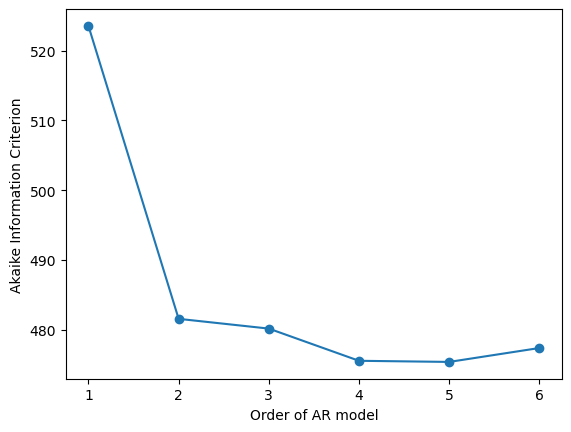

In [10]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de información Akaike
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1, 7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criterion')
plt.show();

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

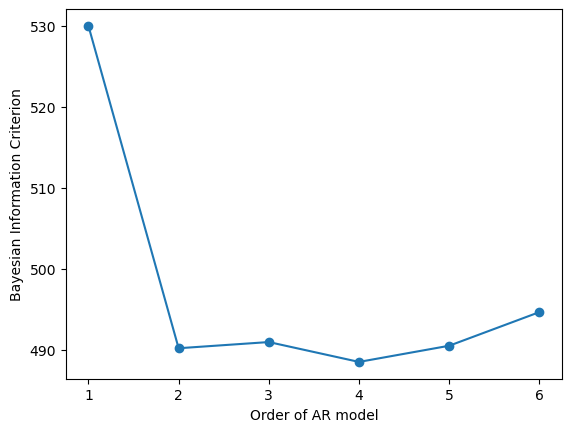

In [11]:
# Ahora el criterio Bayesian
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1, 7), BIC[1:7], marker = 'o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [12]:
# Modelo AR(1) 
mod = ARIMA(train, order = (1, 0, 0))
res = mod.fit()
predicciones = res.forecast(len(test))
predicciones.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


75    76.827506
76    76.827515
77    76.827511
78    76.827512
79    76.827512
Name: predicted_mean, dtype: float64

In [13]:
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test = test.reset_index()
predicciones = predicciones.reset_index()

In [14]:
acumulador1 = 0
acumulador2 = 0

for contador in range(0, 16):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1])**2
    acumulador2 = acumulador2 + np.abs((test.iloc[contador][1] - predicciones.iloc[contador][1]) /
                                        test.iloc[contador][1])
mse = acumulador1 / 16
rmse = np.round(np.sqrt(mse), 2)
mape = np.round((acumulador2 / 16) * 100, 2)
print("RMSE =", rmse, "MAPE =", mape, "%")

RMSE = 5.7 MAPE = 4.94 %


### Es un buen ajuste ya que el ajuste solo nos da una desviacion de los valores del 5%

In [16]:
# Pronostico de los proximos meses
predicciones = res.forecast(len(test) + 10)
predicciones.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


85    76.827512
86    76.827512
87    76.827512
88    76.827512
89    76.827512
Name: predicted_mean, dtype: float64

In [17]:
# Pronostico por intervalo de los proximos meses
conf = res.get_forecast(len(test) + 5).conf_int(alpha = 0.05)
conf.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
80,47.958962,105.696062
81,47.958962,105.696062
82,47.958962,105.696062
83,47.958962,105.696062
84,47.958962,105.696062


In [18]:
lista = test['week']
lista = pd.DataFrame(lista)
test.index = test['week']
test.drop(columns = ['week'], inplace = True)

In [19]:
lista2 = []
for i in range(1, 10):
    fecha = 52 + i
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns = ['week'])
fechas = pd.concat([lista, lista2], ignore_index=True)
fechas = fechas.reset_index()
fechas.drop(columns = ['index'], inplace = True)
fechas

,week
0,37
1,38
2,39
3,40
4,41
5,42
6,43
7,44
8,45
9,46


In [20]:
predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()
predicciones.drop(columns = ['index'], inplace = True)
predicciones

,predicted_mean
0,77.448635
1,76.608069
2,76.905042
3,76.800121
4,76.837190
5,76.824093
6,76.828720
7,76.827085
8,76.827663
9,76.827459


In [21]:
frames = [fechas, predicciones]
result = pd.concat(frames, axis = 1, join = 'inner')
result.columns = ['week', 'Predicciones']
result.index = result['week']
result.drop(columns = ["week"], inplace = True)
result

,Predicciones
week,
37,77.448635
38,76.608069
39,76.905042
40,76.800121
41,76.837190
42,76.824093
43,76.828720
44,76.827085
45,76.827663


In [22]:
conf = conf.reset_index()
conf.drop(columns = ["index"], inplace = True)
frames = [fechas, conf]
intervalos = pd.concat(frames, axis = 1, join = 'inner')
intervalos.index = intervalos['week']
intervalos.drop(columns = ['week'], inplace = True)
intervalos

,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
week,,
37,50.441826,104.455444
38,47.965294,105.250844
39,48.064577,105.745507
40,47.935075,105.665167
41,47.969077,105.705302
42,47.955598,105.692589
43,47.960177,105.697263
44,47.958536,105.695635
45,47.959113,105.696213


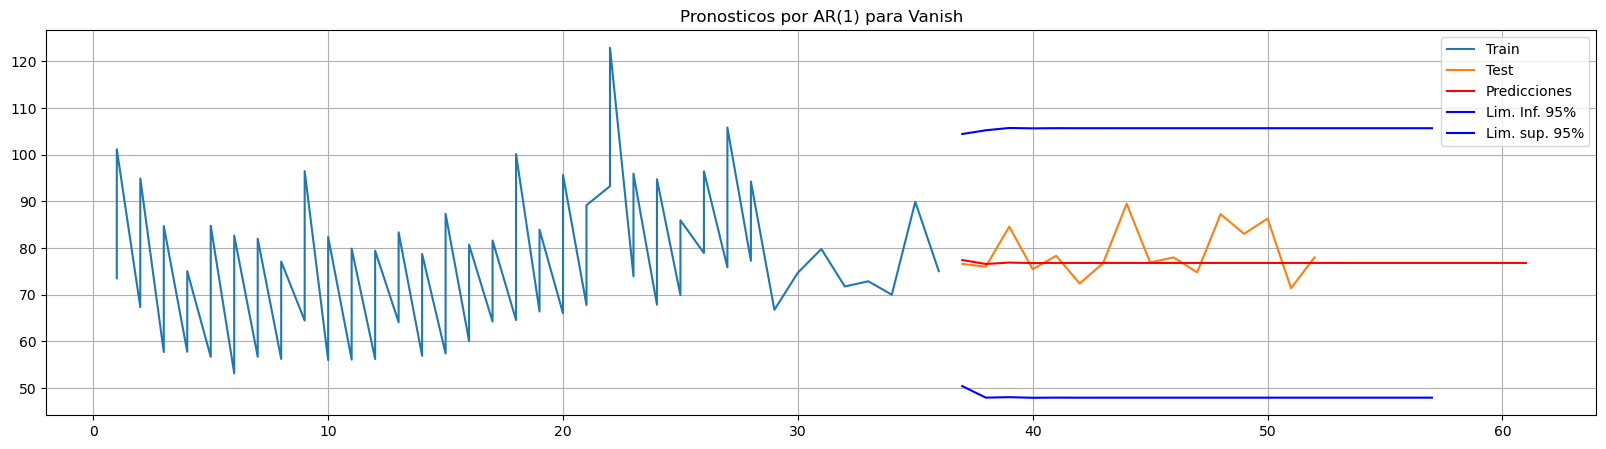

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(result, label = "Predicciones", color = 'red')
plt.plot(intervalos["lower TOTAL_VALUE_SALES"], label = "Lim. Inf. 95%", color = 'blue')
plt.plot(intervalos["upper TOTAL_VALUE_SALES"], label = "Lim. sup. 95%", color = 'blue')
plt.legend(loc = 'best')
plt.title("Pronosticos por AR(1) para Vanish")
plt.show()

## Inicio del analisis de tiempo para los productos Lysol

<Axes: xlabel='week'>

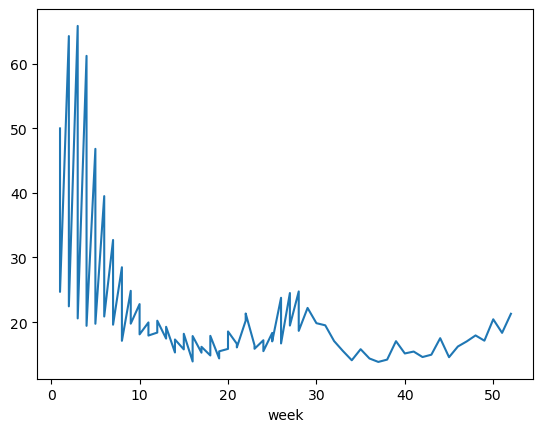

In [25]:
df_L["TOTAL_VALUE_SALES"].plot()

### Por como se comporta la grafica se puede suponer que no se trata de una serie estacionaria

In [27]:
# Definicion de grupos de prueba y entrenamiento
len_train = int(len(df_L)* 0.8)
len_test = int(len(df_L)*0.2)
train = df_L[0:len_train]
test = df_L[len_train:]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

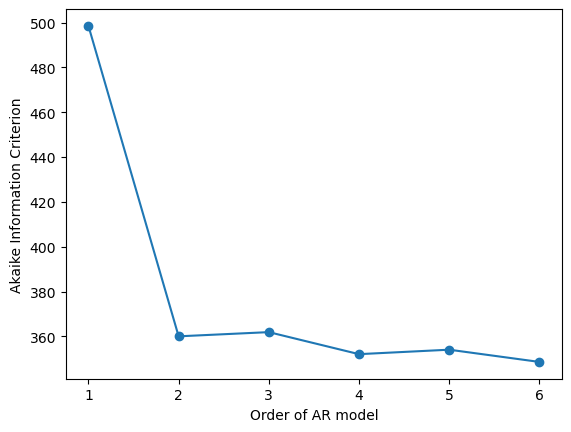

In [28]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de información Akaike
AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1, 7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criterion')
plt.show();

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

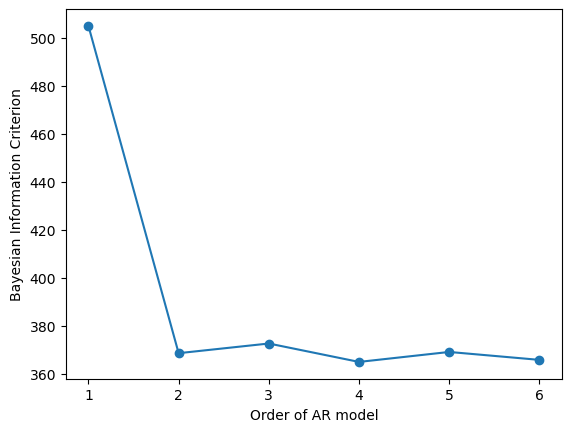

In [29]:
# Ahora el criterio Bayesian
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1, 7), BIC[1:7], marker = 'o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [30]:
# Modelo AR(1) 
mod = ARIMA(train, order = (1, 1, 1))
res = mod.fit()
predicciones = res.forecast(len(test))
predicciones.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


75    14.560162
76    15.602563
77    14.585696
78    15.577656
79    14.609993
Name: predicted_mean, dtype: float64

In [31]:
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test = test.reset_index()
predicciones = predicciones.reset_index()

In [32]:
acumulador1 = 0
acumulador2 = 0

for contador in range(0, 16):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1])**2
    acumulador2 = acumulador2 + np.abs((test.iloc[contador][1] - predicciones.iloc[contador][1]) /
                                        test.iloc[contador][1])
mse = acumulador1 / 16
rmse = np.round(np.sqrt(mse), 2)
mape = np.round((acumulador2 / 16) * 100, 2)
print("RMSE =", rmse, "MAPE =", mape, "%")

RMSE = 2.76 MAPE = 11.33 %


### Es un buen ajuste ya que el ajuste solo nos da una desviacion de los valores del 11.33%

In [34]:
# Pronostico de los proximos meses
predicciones = res.forecast(len(test) + 10)
predicciones.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


85    14.676057
86    15.489508
87    14.695982
88    15.470071
89    14.714943
Name: predicted_mean, dtype: float64

In [35]:
# Pronostico por intervalo de los proximos 5 años
conf = res.get_forecast(len(test) + 5).conf_int(alpha = 0.05)
conf.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
80,-4.284027,35.391934
81,-5.253409,34.519639
82,-5.212290,36.275085
83,-6.142674,35.452910
84,-6.079736,37.099603


In [36]:
lista = test['week']
lista = pd.DataFrame(lista)
test.index = test['week']
test.drop(columns = ['week'], inplace = True)

In [37]:
lista2 = []
for i in range(1, 10):
    fecha = 52 + i
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns = ['week'])
fechas = pd.concat([lista, lista2], ignore_index=True)
fechas = fechas.reset_index()
fechas.drop(columns = ['index'], inplace = True)
fechas

,week
0,37
1,38
2,39
3,40
4,41
5,42
6,43
7,44
8,45
9,46


In [38]:
predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()
predicciones.drop(columns = ['index'], inplace = True)
predicciones

,predicted_mean
0,15.780981
1,14.411649
2,15.747439
3,14.444369
4,15.715521
5,14.475505
6,15.685147
7,14.505135
8,15.656243
9,14.533331


In [39]:
frames = [fechas, predicciones]
result = pd.concat(frames, axis = 1, join = 'inner')
result.columns = ['week', 'Predicciones']
result.index = result['week']
result.drop(columns = ["week"], inplace = True)
result

,Predicciones
week,
37,15.780981
38,14.411649
39,15.747439
40,14.444369
41,15.715521
42,14.475505
43,15.685147
44,14.505135
45,15.656243


In [40]:
conf = conf.reset_index()
conf.drop(columns = ["index"], inplace = True)
frames = [fechas, conf]
intervalos = pd.concat(frames, axis = 1, join = 'inner')
intervalos.index = intervalos['week']
intervalos.drop(columns = ['week'], inplace = True)
intervalos

,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
week,,
37,8.625713,22.936248
38,7.251058,21.572240
39,5.742994,25.751885
40,4.430233,24.458504
41,3.595998,27.835044
42,2.341294,26.609716
43,1.836718,29.533576
44,0.636643,28.373627
45,0.327907,30.984579


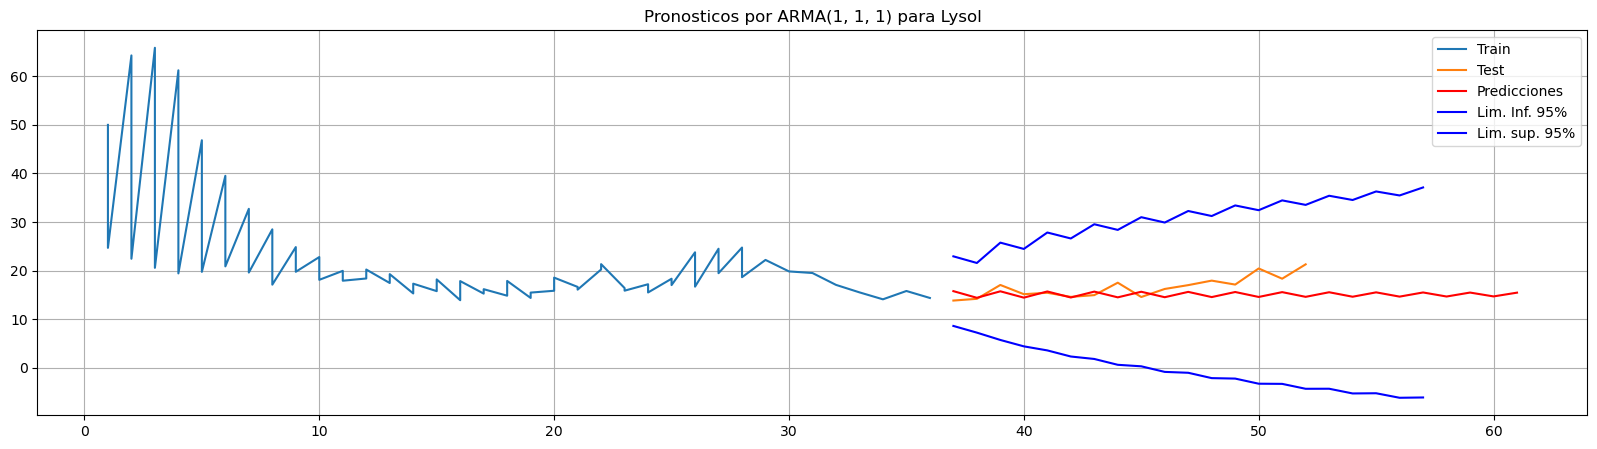

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(result, label = "Predicciones", color = 'red')
plt.plot(intervalos["lower TOTAL_VALUE_SALES"], label = "Lim. Inf. 95%", color = 'blue')
plt.plot(intervalos["upper TOTAL_VALUE_SALES"], label = "Lim. sup. 95%", color = 'blue')
plt.legend(loc = 'best')
plt.title("Pronosticos por ARMA(1, 1, 1) para Lysol")
plt.show()